# Binary Orbits and Relativity

Computing orbits in Newtonian gravitation can be done analytically. We begin here with
finding the orbits for Newtonian gravity, then we look at the addition of correction
terms from general relativity using the post-Newtonian approximation.

The Einstein equations of general relativity are complicated equations that are very
difficult to solve.  The post-Newtonian approximation of general relativity is an expansion
of the Einstein equations that is valid when the speeds are much less than the speed of
light, and the gravitational potential, ``\Phi`` is relatively small
$$
\frac{v^2}{c^2}\ll 1 \qquad \left| \Phi \right| = \left|\frac{Gm_1 m_2}{rc^2}\right| \ll 1,
$$
where $c$ is the speed of light.

We use the post-Newtonian formalism in Hamiltonian form (Damour, Jaranowski, and Sch&auml;fer, 2000).   The Hamiltonian is expanded in  powers of $1/c^2$ as
$$
H(\mathbf{r},\mathbf{p}) = H_{\rm N}(\mathbf{q},\mathbf{p}) 
+ \frac{1}{c^2} H_{\rm 1PN}(\mathbf{q},\mathbf{p}) 
+ \frac{1}{c^4} H_{\rm 2PN}(\mathbf{q},\mathbf{p}) + \ldots
$$
where $H_{\rm N}$ is the Hamiltonian for Newtonian gravity, and $H_{\rm 1PN}$ and
$H_{\rm 2PN}$ are the first- and second-order post-Newtonian corrections, respectively.
The Hamiltonian is a function of the coordinates $\mathbf{q}$ and the momentum $\mathbf{p}$.
We choose polar coordinates $\mathbf{q} = (r,\theta)$, and the momentum squared is
$$
\mathbf{p}^2 = p_r^2 + \frac{J^2}{r^2},
$$
where $p_r$ is the radial momentum and $J$ is the angular momentum component
normal to the plane.  As the Hamiltonian does not depend explicitly on $\theta$, 
the angular momentum $J$ is conserved.

Hamilton's equations are
$$
\dot{\mathbf{q}} = \frac{\partial H}{\partial \mathbf{p}}, \qquad
\dot{\mathbf{p}} = -\frac{\partial H}{\partial \mathbf{q}}.
$$
These equations are computed in `Mathematica` and included in `eqspolarPN.jl`.  Initial data for circular orbits are also included.  The differential equations are written 
$$\dot{u} = F(u),$$
where $F$ and $u$ are vectors, with $u$ the state vector
$$
u = \begin{pmatrix} r\\ p_r\\ \theta\end{pmatrix}.
$$


Reference: T. Damour, P. Jaranowski, and G. Sch&auml;fer, "Dynamical invariants for general relativistic two-body systems at the third post-Newtonian approximation," *Physical Review* D**62** 044024 (2000).

In [1]:
using DifferentialEquations
using Plots

In [2]:
include("../src/binaryPN/eqspolarPN.jl")

eqspn2! (generic function with 1 method)

## Choose initial binary parameters

The two bodies have masses `m1` and `m2`.  The post-Newtonian approximation is not particularly accurate for large mass ratios, but they still give an approximation to the full relativistic solution.  We choose a large value for the semi-major axis, $a$, so that the post-Newtonian approximation is still valid for large eccentricities.  The reduced mass is $\mu$.

In [3]:
m1 = 1.0
m2 = 0.1
M = m1+m2
mu = m1*m2/M
nu = mu/M
a = 600.0

600.0

## Calculate initial data for circular orbits

We choose initial data by setting $a$, the semi-major axis of the orbit, and calculate $J$ for a circular orbit.  The initial position of the reduced mass is on the $x$-axis, $\mathbf{q}_0 = (r_0,\theta_0) = (a, 0)$. Initial data for eccentric orbits in GR is more difficult to set, so we simply reduce the angular momentum.  The period of a circular orbit is
$$
T = 2\pi\sqrt{\frac{a^3}{GM}}.
$$
The period of elliptical orbits is shorter.

In [4]:
J0 = circularID_PN0(a)
J1 = circularID_PN1(a, nu)
J2 = circularID_PN2(a, nu)

24.576709375302176

In [5]:
p0 = [mu, nu, J0*0.35]
p1 = [mu, nu, J1*0.35]
p2 = [mu, nu, J2*0.35]
u0 = [a, 0.0, 0.0]
period = 2.0*pi*sqrt(a^3)  # period of circular orbit
np = 5 # number of periods 
tau = np * period
tout = period/1000

92.34358777165421

## Newtonian Gravity (PN0)

In [6]:
tspan=(0.0,tau)
prob0 = ODEProblem(eqspn0!, u0, tspan, p0)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 461717.9388582711)
u0: 3-element Vector{Float64}:
 600.0
   0.0
   0.0

In [7]:
sol0 = solve(prob0, Vern7(), reltol=1.0e-12, abstol=1.0e-12, saveat=tout);

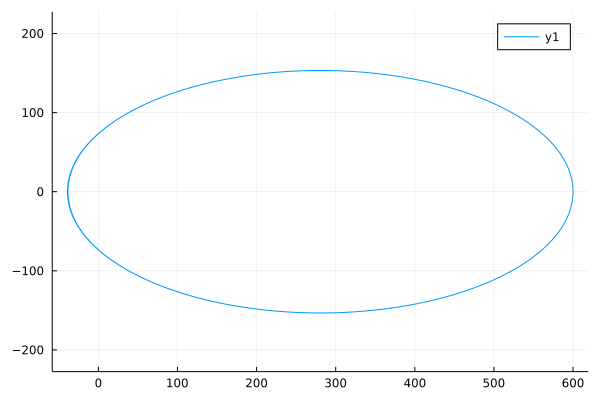

In [8]:
r0 = sol0[1,:]
theta0 = sol0[3,:]
x0 = similar(r0)
y0 = similar(r0)
@. x0 = r0*cos(theta0)
@. y0 = r0*sin(theta0)
plot(x0,y0,aspect_ratio=:equal)

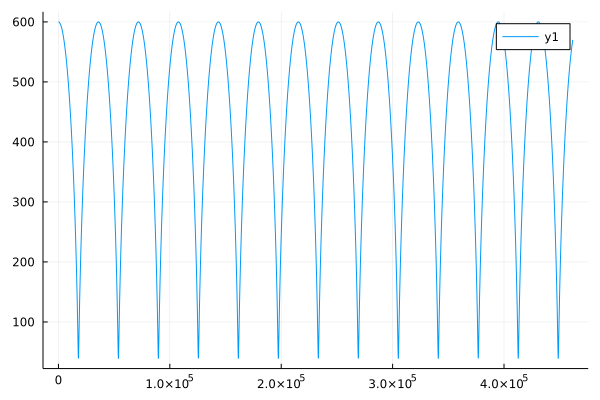

In [9]:
plot(sol0.t, r0)

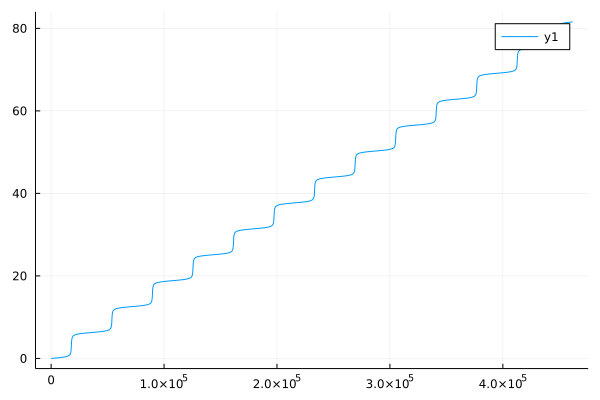

In [10]:
plot(sol0.t, theta0)

## First-Order Post-Newtonian (PN1)

Orbits for the Newtonian potential $V\propto 1/r$ are closed.  The only other potential for central forces with closed orbits is the harmonic oscillator potential $V\propto r^2$.  The post-Newtonian equations have additional potential terms, which means that the orbits do not close.  

This precession of the orbits was first measured in the orbit of Mercury in the middle of the 19th century.  While most of Mercury's precession comes from perturbations from other planets, such as Jupiter, the complete explanation did not come until Einstein calculated the additional precession expected from general relativity.

In [11]:
tspan=(0.0,tau)
prob1 = ODEProblem(eqspn1!, u0, tspan, p1)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 461717.9388582711)
u0: 3-element Vector{Float64}:
 600.0
   0.0
   0.0

In [12]:
sol1 = solve(prob1, Vern9(), reltol=1.0e-12, abstol=1.0e-12, saveat=tout);

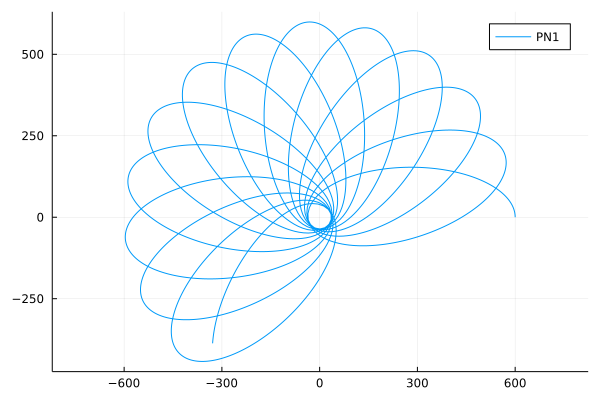

In [13]:
r1 = sol1[1,:]
theta1 = sol1[3,:]
x1 = similar(r1)
y1 = similar(r1)
@. x1 = r1*cos(theta1)
@. y1 = r1*sin(theta1)
plot(x1,y1,aspect_ratio=:equal,label="PN1")

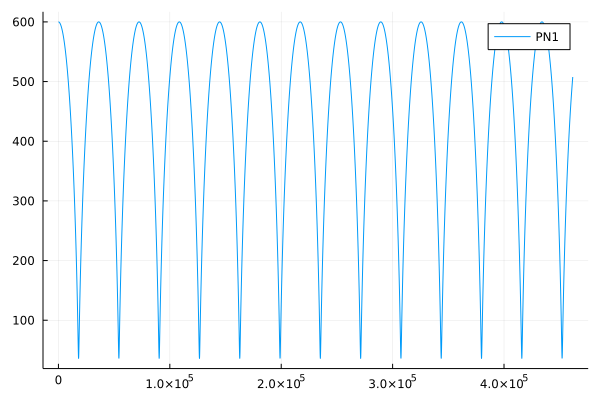

In [14]:
plot(sol1.t, r1,label="PN1")

## Second-Order Post-Newtonian (PN2)

In [15]:
tspan=(0.0,tau)
prob2 = ODEProblem(eqspn2!, u0, tspan, p2)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 461717.9388582711)
u0: 3-element Vector{Float64}:
 600.0
   0.0
   0.0

In [16]:
sol2 = solve(prob2, Vern9(), reltol=1.0e-12, abstol=1.0e-12, saveat=tout);

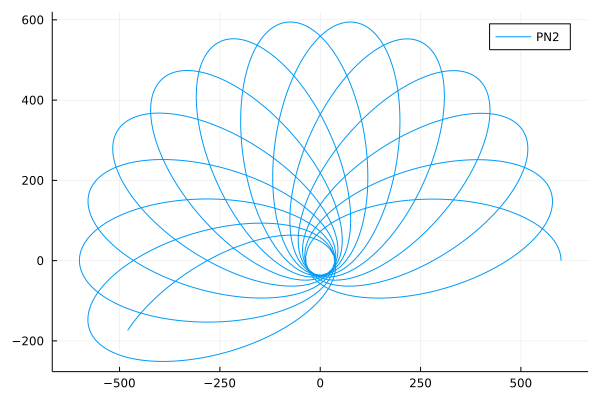

In [17]:
t2 = sol2.t
r2 = sol2[1,:]
theta2 = sol2[3,:]
x2 = similar(r2)
y2 = similar(r2)
@. x2 = r2*cos(theta2)
@. y2 = r2*sin(theta2)
plot(x2,y2,aspect_ratio=:equal,label="PN2")

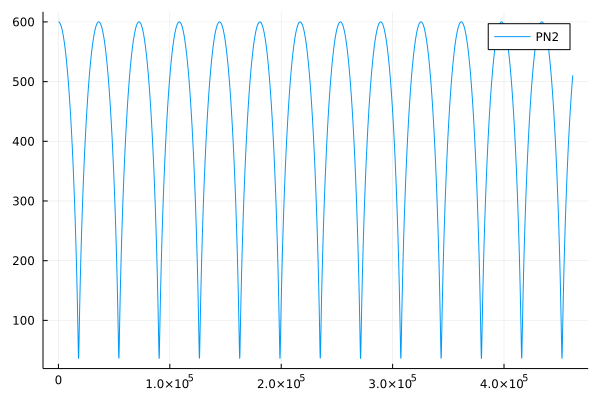

In [18]:
plot(t2, r2,label="PN2")

### Compare the PN1 and PN2 solutions


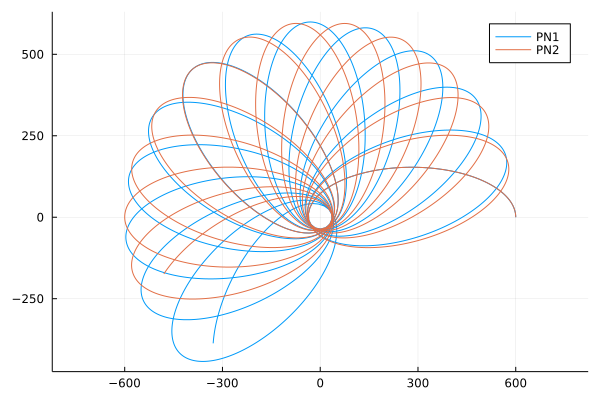

In [19]:
plot(x1,y1,aspect_ratio=:equal,label="PN1")
plot!(x2,y2,aspect_ratio=:equal,label="PN2")

## Animations

In [36]:
a0 = Animation()
ox = Float64[0.0]
oy = Float64[0.0]
outfreq = 5
lim = 600.0
xrange = (-100, 700)
yrange = (-200, 200)
label0 = "Newtonian"
n = length(sol0.t)
for i = 1:outfreq:n
    bi = 1
    ei = i
    inds = bi:ei
    plt = plot( x0[inds], y0[inds], xlim=xrange, ylim=yrange, aspect_ratio=:equal, label=false, color = :blue)
    plt = plot!([x0[i]], [y0[i]], seriestype = :scatter, color=:blue, label=label0)
    plt = plot!(ox, oy, seriestype = :scatter, color=:yellow, label=false, marker=10, markershape = :star)
    frame(a0, plt)
end

┌ Info: Saved animation to 
│   fn = /Users/dwn8/.julia/dev/numex/examples/binaryPN0.gif
└ @ Plots /Users/dwn8/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/Users/dwn8/.julia/dev/numex/examples/binaryPN0.gif")
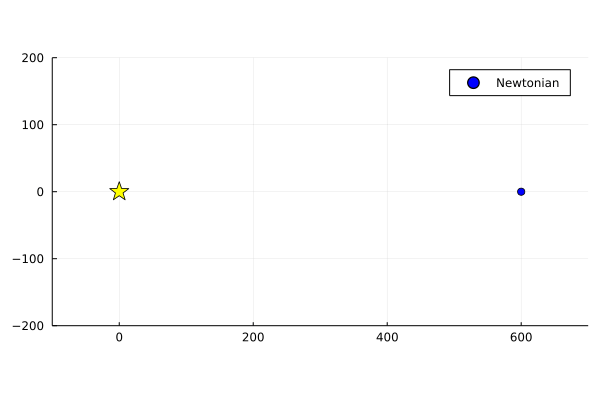

In [37]:
gif(a0, "binaryPN0.gif", fps=30)

In [38]:
a1 = Animation()
outfreq = 5
lim = 600.0
xrange = (-lim, lim)
yrange = (-300, lim)
label1 = "PN1"
n = length(sol1.t)
for i = 1:outfreq:n
    bi = 1
    ei = i
    inds = bi:ei
    plt = plot( x1[inds], y1[inds], xlim=xrange, ylim=yrange, aspect_ratio=:equal, label=false, color = :blue)
    plt = plot!([x1[i]], [y1[i]], seriestype = :scatter, color=:blue, label=label1)
    plt = plot!(ox, oy, seriestype = :scatter, color=:yellow, label=false, marker=10, markershape = :star)
    frame(a1, plt)
end

┌ Info: Saved animation to 
│   fn = /Users/dwn8/.julia/dev/numex/examples/binaryPN1.gif
└ @ Plots /Users/dwn8/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/Users/dwn8/.julia/dev/numex/examples/binaryPN1.gif")
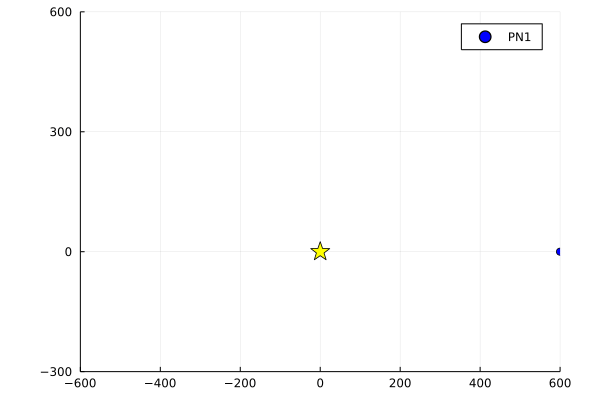

In [39]:
gif(a1, "binaryPN1.gif", fps=30)

In [40]:
a2 = Animation()
outfreq = 5
lim = 600.0
tail = 50
xrange = (-lim, lim)
yrange = (-300, lim)
label2 = "PN2"
n = length(t2)
for i = 1:outfreq:n
    bi = 1
    ei = i
    inds = bi:ei
    plt = plot( x2[inds], y2[inds], xlim=xrange, ylim=yrange, aspect_ratio=:equal, label=false, color = :blue)
    plt = plot!([x2[i]], [y2[i]], seriestype = :scatter, color=:blue, label=label2)
    plt = plot!(ox, oy, seriestype = :scatter, color=:yellow, label=false, marker=10, markershape = :star)
    frame(a2, plt)
end

┌ Info: Saved animation to 
│   fn = /Users/dwn8/.julia/dev/numex/examples/binaryPN2.gif
└ @ Plots /Users/dwn8/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/Users/dwn8/.julia/dev/numex/examples/binaryPN2.gif")
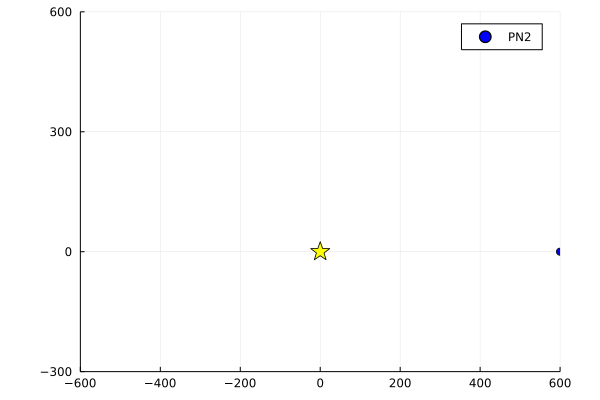

In [41]:
gif(a2, "binaryPN2.gif", fps=30)

In [42]:
a3 = Animation()
outfreq = 5
lim = 600.0
tail = 50
xrange = (-lim, lim)
yrange = (-300, lim)
label2 = "PN2"
n = length(t2)
for i = 1:outfreq:n
    bi = 1
    ei = i
    inds = bi:ei
    plt = plot( x1[inds], y1[inds], xlim=xrange, ylim=yrange, aspect_ratio=:equal, label=false, color = :red)
    plt = plot!([x1[i]], [y1[i]], seriestype = :scatter, color=:red, label=label1)
    plt = plot!( x2[inds], y2[inds], xlim=xrange, ylim=yrange, aspect_ratio=:equal, label=false, color = :blue)
    plt = plot!([x2[i]], [y2[i]], seriestype = :scatter, color=:blue, label=label2)
    plt = plot!(ox, oy, seriestype = :scatter, color=:yellow, label=false, marker=10, markershape = :star)
    frame(a3, plt)
end

┌ Info: Saved animation to 
│   fn = /Users/dwn8/.julia/dev/numex/examples/binaryPN1PN2.gif
└ @ Plots /Users/dwn8/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/Users/dwn8/.julia/dev/numex/examples/binaryPN1PN2.gif")
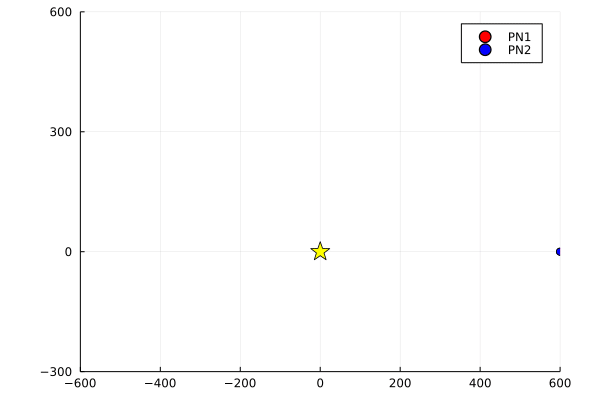

In [43]:
gif(a3, "binaryPN1PN2.gif", fps=30)

In [44]:
mp4(a0, "binaryPN0.mp4",fps=60)

┌ Info: Saved animation to 
│   fn = /Users/dwn8/.julia/dev/numex/examples/binaryPN0.mp4
└ @ Plots /Users/dwn8/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/Users/dwn8/.julia/dev/numex/examples/binaryPN0.mp4")

In [45]:
mp4(a2, "binaryPN2.mp4", fps=60)

┌ Info: Saved animation to 
│   fn = /Users/dwn8/.julia/dev/numex/examples/binaryPN2.mp4
└ @ Plots /Users/dwn8/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/Users/dwn8/.julia/dev/numex/examples/binaryPN2.mp4")